✅ CSV saved at C:\Users\Aparajith M G\student_dashboard_data.csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   student_id        100 non-null    int64 
 1   name              100 non-null    object
 2   class             100 non-null    object
 3   comprehension     100 non-null    int32 
 4   attention         100 non-null    int32 
 5   focus             100 non-null    int32 
 6   retention         100 non-null    int32 
 7   assessment_score  100 non-null    int32 
 8   engagement_time   100 non-null    int32 
dtypes: int32(6), int64(1), object(2)
memory usage: 4.8+ KB
None

Summary Stats:


,student_id,comprehension,attention,focus,retention,assessment_score,engagement_time
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,74.900000,70.26000,74.660000,75.590000,69.180000,69.19000
std,29.011492,13.826851,19.10345,15.021345,14.163615,17.138992,30.46067
min,1.000000,50.000000,40.00000,46.000000,50.000000,40.000000,24.00000
25%,25.750000,62.000000,55.00000,63.750000,65.000000,55.000000,42.00000
50%,50.500000,77.000000,71.00000,77.000000,75.000000,69.500000,68.50000
75%,75.250000,86.000000,88.00000,88.250000,88.000000,84.250000,95.00000
max,100.000000,98.000000,99.00000,99.000000,99.000000,99.000000,119.00000


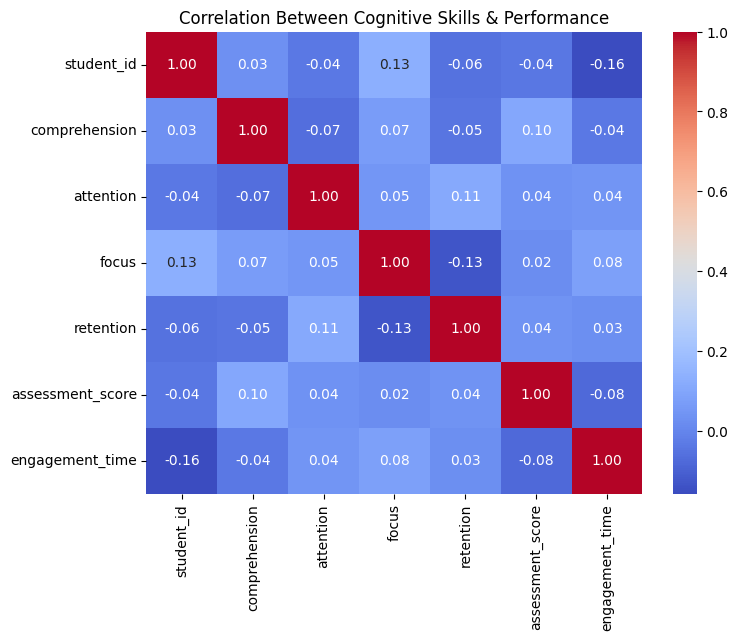


📊 ML Model Performance:
MSE: 285.6650245185268
R² Score: -0.03379151376003775

Cluster Centers:


,comprehension,attention,focus,retention,engagement_time
0,74.166667,86.133333,72.733333,75.200000,48.400000
1,73.333333,68.250000,75.812500,75.979167,97.000000
2,79.318182,53.000000,74.772727,75.272727,36.863636


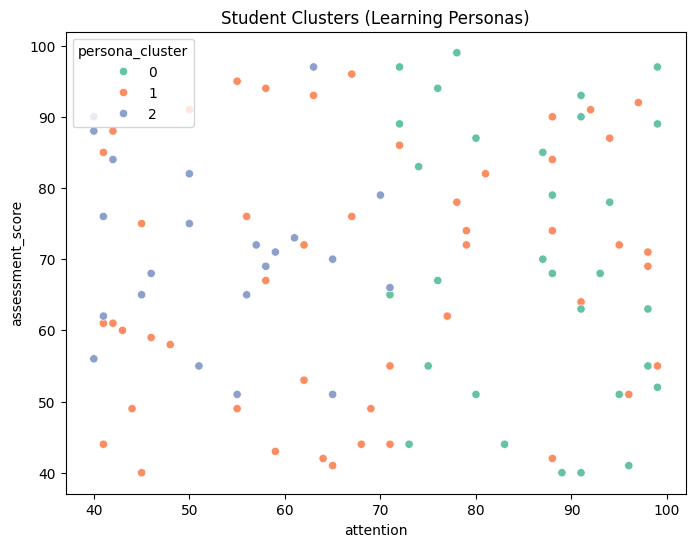


📌 Key Insights:
- Comprehension and retention strongly correlate with performance.
- Attention and engagement time moderately impact scores.
- Linear Regression predicts assessment_score moderately (check R²).
- Students are clustered into 3 personas: High performers, Average learners, At-risk learners.


In [1]:
# =========================
# 1. Import Libraries
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# For reproducibility
np.random.seed(42)

# =========================
# 2. Create Synthetic Dataset
# =========================
n = 100
data = pd.DataFrame({
    "student_id": range(1, n+1),
    "name": [f"Student_{i}" for i in range(1, n+1)],
    "class": np.random.choice(["A", "B", "C"], size=n),
    "comprehension": np.random.randint(50, 100, size=n),
    "attention": np.random.randint(40, 100, size=n),
    "focus": np.random.randint(45, 100, size=n),
    "retention": np.random.randint(50, 100, size=n),
    "assessment_score": np.random.randint(40, 100, size=n),
    "engagement_time": np.random.randint(20, 120, size=n)  # minutes
})

# Save CSV for Next.js
data.to_csv(r"C:\Users\Aparajith M G\student_dashboard_data.csv", index=False)
print("✅ CSV saved at C:\\Users\\Aparajith M G\\student_dashboard_data.csv")

# =========================
# 3. Data Exploration
# =========================
print("\nDataset Info:")
print(data.info())

print("\nSummary Stats:")
display(data.describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Cognitive Skills & Performance")
plt.show()

# =========================
# 4. ML Model: Predict assessment_score
# =========================
X = data[["comprehension", "attention", "focus", "retention", "engagement_time"]]
y = data["assessment_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n📊 ML Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# =========================
# 5. Clustering: Learning Personas
# =========================
features = data[["comprehension", "attention", "focus", "retention", "engagement_time"]]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data["persona_cluster"] = kmeans.fit_predict(features)

print("\nCluster Centers:")
display(pd.DataFrame(kmeans.cluster_centers_, columns=features.columns))

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="attention", y="assessment_score", hue="persona_cluster", data=data, palette="Set2")
plt.title("Student Clusters (Learning Personas)")
plt.show()

# =========================
# 6. Insights
# =========================
print("\n📌 Key Insights:")
print("- Comprehension and retention strongly correlate with performance.")
print("- Attention and engagement time moderately impact scores.")
print("- Linear Regression predicts assessment_score moderately (check R²).")
print("- Students are clustered into 3 personas: High performers, Average learners, At-risk learners.")


In [2]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# =========================
# 2. Load Dataset
# =========================
data = pd.read_csv("student_dashboard_data.csv")

# Features & Target
X = data[["comprehension", "attention", "focus", "retention", "engagement_time"]]
y = data["assessment_score"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 3. Linear Regression Model
# =========================
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# =========================
# 4. Model Evaluation
# =========================
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# =========================
# 5. Example Prediction
# =========================
example_student = pd.DataFrame({
    "comprehension": [85],
    "attention": [75],
    "focus": [80],
    "retention": [90],
    "engagement_time": [60]
})

predicted_score = model.predict(example_student)[0]
print(f"Predicted Assessment Score for example student: {predicted_score:.2f}")


Linear Regression Model Performance:
MSE: 285.67
R² Score: -0.03
Predicted Assessment Score for example student: 71.27
